# Pymaceuticals Inc.
---

### Analysis

These are the conclusions that can be drawn from the analysis performed:

1. When compared to three other drugs, mice treated with Capumolin had a lower median ending tumor volume than all but one drug (Ramicane). There were no outliers for the ending tumor volume among mice treated with Capumolin.

2. When plotting tumor volume against time for just one mouse treated with Capumolin, there is an overall downward trend, suggesting that the drug is effective at reducing tumor volume.

3. There is a very strong positive correlation (r=.95) between mouse weight and average tumor volume. This provides an accurate model for predicting tumor volume based on mouse weight.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

# Combine the data into a single DataFrame
mouse_data_complete=pd.merge(study_results, mouse_metadata, on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
mouse_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
mice_count=len(mouse_data_complete["Mouse ID"].unique())
print(mice_count)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_data=mouse_data_complete.duplicated(subset=["Mouse ID", "Timepoint"])
duplicate_indexes=duplicate_data.index[duplicate_data==True]
duplicate_indexes

Index([861, 863, 865, 867, 869], dtype='int64')

In [4]:
#print ID for duplicate data
duplicate_ID=mouse_data_complete.iloc[duplicate_indexes, 0].unique()
duplicate_ID

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data=mouse_data_complete.loc[mouse_data_complete["Mouse ID"]==duplicate_ID[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data=mouse_data_complete.drop(duplicate_mouse_data.index)
cleaned_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data_count=len(cleaned_mouse_data["Mouse ID"].unique())
cleaned_mouse_data_count

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_vol_mean=cleaned_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
tumor_vol_median=cleaned_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
tumor_vol_var=cleaned_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
tumor_vol_std=cleaned_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
tumor_vol_sem=cleaned_mouse_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary_statistics=pd.DataFrame({"Mean Tumor Volume": tumor_vol_mean,
                                "Median Tumor Volume": tumor_vol_median,
                                "Tumor Volume Variance": tumor_vol_var,
                                "Tumor Volume Std. Dev.": tumor_vol_std,
                                "Tumor Volume Std. Err.":tumor_vol_sem})
summary_statistics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
cleaned_mouse_data.groupby(["Drug Regimen"]).agg({
        "Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]
    })

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: title={'center': 'Drug Regimen Counts'}, xlabel='Drug Regimen'>

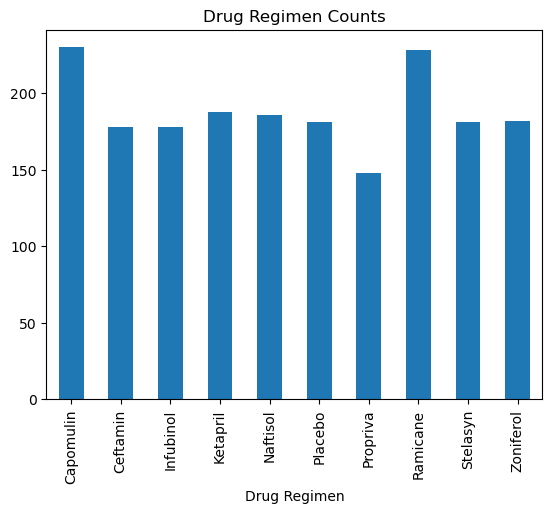

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_count=cleaned_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
bar_chart=drug_count.plot.bar(x=drug_count.index, y=drug_count, title="Drug Regimen Counts")
bar_chart

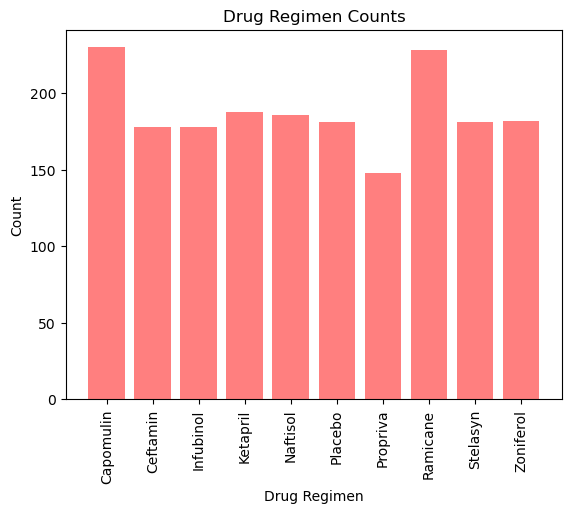

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
mouse_count=cleaned_mouse_data.groupby(["Drug Regimen"]).count()["Mouse ID"]
x_axis = np.arange(len(mouse_count))
plt.bar(mouse_count.index, mouse_count, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, mouse_count.index, rotation="vertical")
plt.title("Drug Regimen Counts")
plt.xlabel("Drug Regimen")
plt.ylabel("Count")
plt.show()

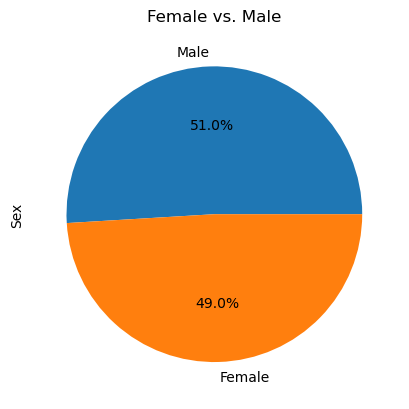

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_sex=cleaned_mouse_data["Sex"].value_counts()
# pie_chart=mouse_sex.plot.pie(y="Sex")
pie_chart = mouse_sex.plot(kind="pie", autopct='%1.1f%%', title='Female vs. Male', ylabel='Sex')

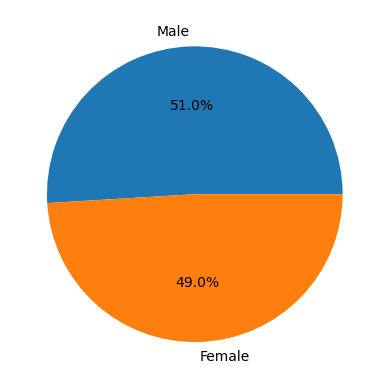

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mouse_sex=cleaned_mouse_data["Sex"].value_counts()
labels=mouse_sex.index
plt.pie(mouse_sex, labels=labels, autopct="%1.1f%%")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_last_timepoint=cleaned_mouse_data.groupby(["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_data=pd.merge(cleaned_mouse_data, mouse_last_timepoint, on=["Timepoint", "Mouse ID"])
merged_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,35,71.905117,0,Ketapril,Female,2,29
3,a457,10,49.783419,0,Ketapril,Female,11,30
4,c819,40,62.175705,1,Ketapril,Male,21,25


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
mouse_list=cleaned_mouse_data["Mouse ID"].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    
for drug in drug_list:
    drug_df=merged_mouse_data.loc[(merged_mouse_data["Drug Regimen"]==drug)]
    tumor_volumes.append(drug_df["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
outliers=[]
for x in range (len(tumor_volumes)):
    quartiles=tumor_volumes[x].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr) 
    for value in tumor_volumes[x]:
        if (value<lower_bound) | (value>upper_bound):
            print(f"{drug_list[x]} has potential outlier: {value}.")

Infubinol has potential outlier: 36.3213458.


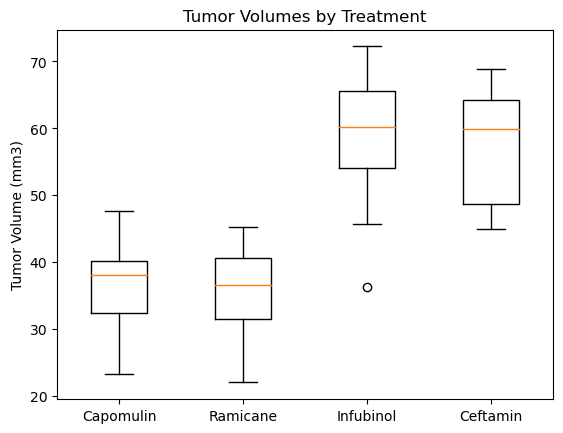

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
ax1.set_title("Tumor Volumes by Treatment")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.boxplot(tumor_volumes, labels=drug_list)
plt.show()

## Line and Scatter Plots

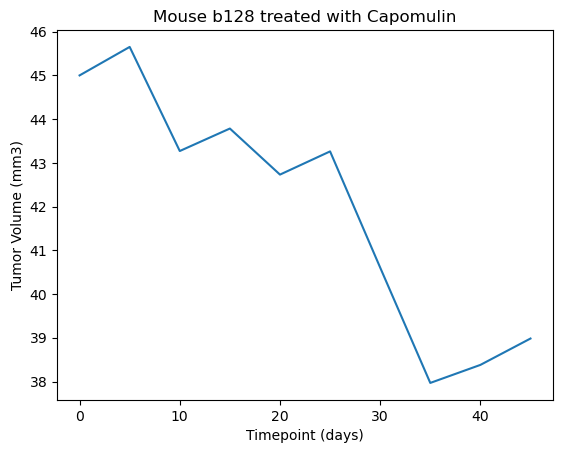

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df=cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"]=="Capomulin"]
mouse_b128=capomulin_df.loc[capomulin_df["Mouse ID"]=="b128"]
mouse_b128
x_values=mouse_b128["Timepoint"]
y_values=mouse_b128["Tumor Volume (mm3)"]
plt.plot(x_values, y_values)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse b128 treated with Capomulin")
plt.show()

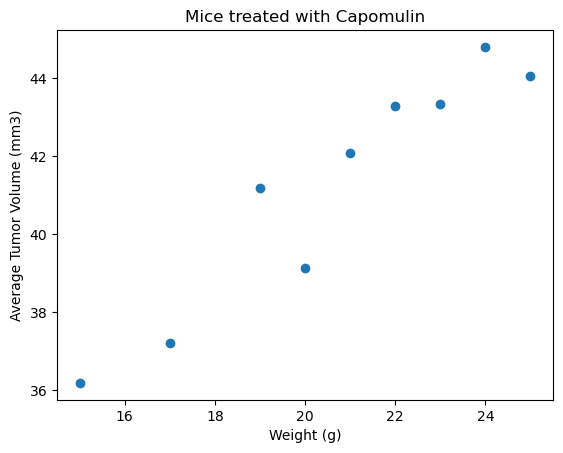

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_avg=capomulin_df.groupby(["Weight (g)"])["Tumor Volume (mm3)"].mean()
x_values=capomulin_avg.index
y_values=capomulin_avg
plt.scatter(x_values, y_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice treated with Capomulin")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.95


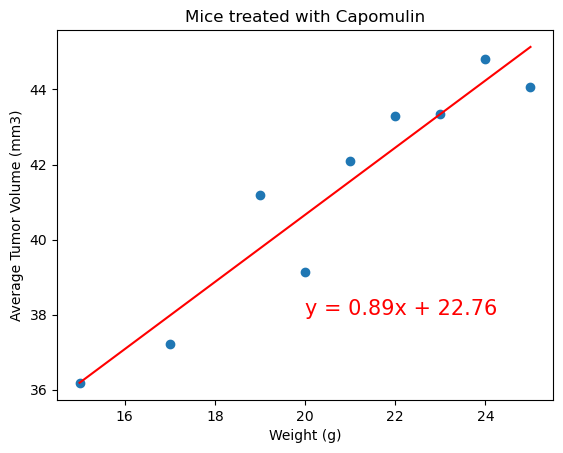

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"r-")
plt.scatter(x_values,y_values)
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Mice treated with Capomulin")
plt.show()